<a href="https://colab.research.google.com/github/samanatt/persian-digit-classification-with-knn/blob/main/First_MLP_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **tensorflow2(keras + Tensorflow) to build a MLP Arch to predict Persain digits**


In [61]:
#!mkdir dataset
#!wget https://github.com/samanatt/persian-digit-classification-with-knn/raw/main/dataset/Data_hoda_full.mat -P dataset
#!wget https://raw.githubusercontent.com/samanatt/persian-digit-classification-with-knn/main/NewDataset.py

In [62]:
from tensorflow import keras
import tensorflow as tf

from keras.layers import Dense
from keras.models import Sequential

import numpy as np
import scipy as sp

from NewDataset import load_hoda

In [63]:
x_train_org,y_train_org, x_test_org,y_test_org = load_hoda()

In [64]:
x_train_org.shape
#x_train_org[0]

(1000, 784)

In [65]:
type(x_test_org)

numpy.ndarray

In [66]:
y_train_org.shape
#y_train_org[45]

(1000,)

In [67]:
y_train =keras.utils.to_categorical(y_train_org,num_classes=10)
y_test =keras.utils.to_categorical(y_test_org,num_classes=10)

In [68]:
x_train = x_train_org.astype('float32')
x_test = x_test_org.astype('float32')
x_train /= 255
x_test /= 255

In [69]:
#model = Sequential()
#model.add(Dense(64,activation='relu',input_dim=x_train.shape[-1]))
#model.add(Dense(10,activation='softmax'))

In [70]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(64,activation='relu',input_dim=x_train.shape[-1]),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='sigmoid')
    ])

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [73]:
model_mlp = model.fit(x_train, y_train,epochs = 20, batch_size = 64,
              validation_split=0.2)

Epoch 1/20
13/13 [==============================] - 1s 18ms/step - loss: 1.7822 - accuracy: 0.3925 - val_loss: 1.0567 - val_accuracy: 0.7350
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 1.0942 - accuracy: 0.6488 - val_loss: 0.6935 - val_accuracy: 0.8250
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 0.8234 - accuracy: 0.7538 - val_loss: 0.5581 - val_accuracy: 0.8700
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6385 - accuracy: 0.8050 - val_loss: 0.5394 - val_accuracy: 0.8500
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5824 - accuracy: 0.8375 - val_loss: 0.3785 - val_accuracy: 0.8950
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5327 - accuracy: 0.8375 - val_loss: 0.3733 - val_accuracy: 0.9000
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 0.4450 - accuracy: 0.8487 - val_loss: 0.3199 - val_accuracy: 0.9000
Epoch 8/20
13/13 [=

In [74]:
model.evaluate(x_test,y_test,verbose=2)

7/7 - 0s - loss: 0.1394 - accuracy: 0.9600 - 36ms/epoch - 5ms/step


[0.13937005400657654, 0.9599999785423279]

In [75]:
x_test[5].shape

(784,)

In [76]:
type(x_test[5])

numpy.ndarray

In [77]:
predicted = model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [78]:
predicted_classes = np.argmax(predicted, axis=1)

In [79]:
print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test_org)

predicted:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 8 8 2 9 8 8 6 6 6 6 6 2 4 2 4 4 5 9 1
 8 4 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 4 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 0 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 5 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 3 5 7 4 1 3 3 1
 1 3 3 8 9 6 7 7 2 3 0 1 4 9 5]
True Label:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 2 3 0 1 4 9 5]


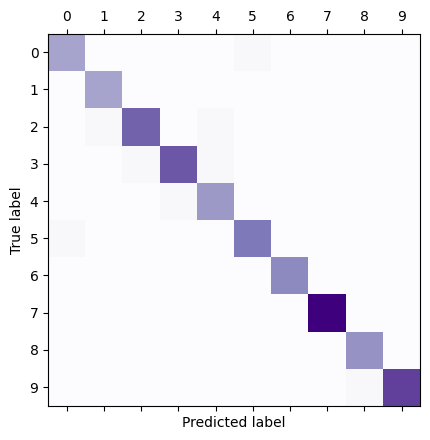

In [80]:

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test_org, predicted_classes), cmap="Purples")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");



In [81]:
model_mlp.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

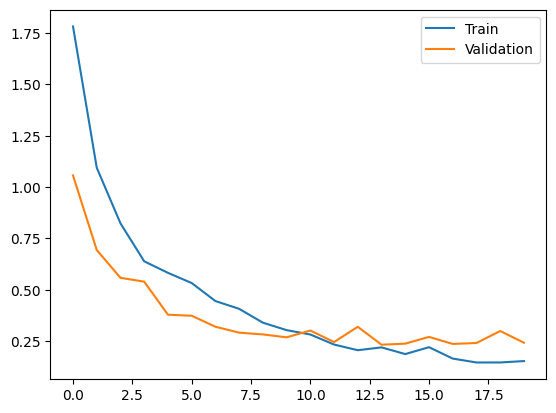

In [82]:
plt.plot(model_mlp.history['loss'])
plt.plot(model_mlp.history['val_loss'])
plt.legend(['Train', 'Validation'])

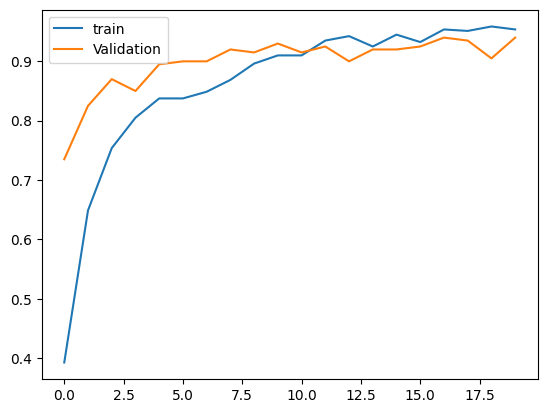

In [83]:
plt.plot(model_mlp.history['accuracy'])
plt.plot(model_mlp.history['val_accuracy'])
plt.legend(['train', 'Validation'])